https://github.com/KacperBudnik/AiSD

In [19]:
class QueueBaE(object):
    """
    Klasa implementująca kolejkę za pomocą pythonowej listy tak,
    że początek kolejki jest przechowywany na początku listy.
    """

    def __init__(self):
        self.list_of_items = []



    def enqueue(self, item):
        """
        Metoda służąca do dodawania obiektu do kolejki.
        Pobiera jako argument obiekt który ma być dodany.
        Niczego nie zwraca.
        """
        #self.list_of_items+=[item]
        self.list_of_items.append(item)

    def dequeue(self):
        """
        Metoda służąca do ściągania obiektu do kolejki.
        Nie pobiera argumentów.
        Zwraca ściągnięty obiekt.
        """
        return self.list_of_items.pop()

    def is_empty(self):
        """
        Metoda służąca do sprawdzania, czy kolejka jest pusta.
        Nie pobiera argumentów.
        Zwraca True jeśli kolejka jest pusta lub False gdy nie jest.
        """
        return not self.list_of_items

    def size(self):
        """
        Metoda służąca do określania wielkości kolejki.
        Nie pobiera argumentów.
        Zwraca liczbę obiektów w kolejce.
        """
        return len(self.list_of_items)

In [16]:
import numpy as np
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}   #lista sąsiedztwa z wagami
        self.color="Black"
        self.distance= np.inf
        self.parent=None
        self.start_time=0
        self.end_time=0
        self.visited=False

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]
    
    def new_search(self):
        self.color="White"
        self.distance= np.inf
        self.parent=None
        self.start_time=0
        self.end_time=0
        

In [17]:
import graphviz

class Graph:
    def __init__(self,name="graphname"):
        self.vertList = {}
        self.numVertices = 0
        self.path_start=None
        self.graphname=name
        self.time=1

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,cost=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()
    
    def __iter__(self):
        return iter(self.vertList.values())
    

###### Pomocnicze
    
    def __repr__(self):
        txt=""
        for i in self:
            txt+=str(i)+"\n"
        return txt[:-1]
                
    def __getitem__(self,k):
        return self.getVertex(k)
    
    
###### Zad 2
    
    def to_dot_language(self,name=None):
        if not name:
            name = self.graphname
        res="digraph "+ name +" {\n"
        for i in self.getVertices():
            for j in self.getVertex(i).getConnections():
                res+= '"'+str(i)+'"' + " -> " + '"'+str(j.id)+'"' + "\n"
        res+="}"
        return res
    
    def create_graphviz(self):
        dot = graphviz.Digraph()
        for i in self.getVertices():
            for j in self.getVertex(i).getConnections():
                dot.edge(str(i),str(j.id))
        return dot
    
    
###### Zad 3 & 5
    
    def Breadth_first_search(self, root):
        
        if not root in self:
            raise ValueError("Nie istnieje taka wartość")
            
        Q=QueueBaE() # z listy 4
            
        for i in self.vertList:
            self.vertList[i].new_search()
        
        self.vertList[root].distance=0
        self.vertList[root].color="Grey"
        
        Q.enqueue(self.vertList[root])
        while not Q.is_empty():
            v=Q.dequeue()
            for i in v.getConnections(): 
                if i.color=="White":
                    i.color="Grey"
                    i.distance = v.distance + 1
                    i.parent = v
                    Q.enqueue(i)
            v.color="Black"
            
    def get_connection(self, start, end, arrows=False):
        # start - punkt początkowy
        # end - końcowy
        # arrows - czy wyświetlać pod sobą, czy strzałkami
        
        if start!=self.path_start:
            self.Breadth_first_search(start)
         
        if not end in self:
            raise ValueError("Nie ma takiego punktu końcowego")
        
        if self[end].color == "White":
            raise Exception("Nie ma takeigo połączenia")
            
        path=[]
        
        current=end
        while self[current].parent:
            #print(self[current].id)
            path.append(self[current])
            current=self[current].parent.id
        path.append(self[start])
        
        txt=""
        if not arrows:
            for i in path[::-1]:
                txt+=str(i.id) + "\n"
                
            txt = txt[:-1]
        else:
            for i in path[::-1]:
                txt+=str(i.id) + " -> "
            txt = txt[:-4]
            
        return txt
        
    def Depth_first_search(self, root):
        self.time=1
        if not root in self:
            raise ValueError("Nie istnieje taka wartość")
        
        self.path_start=root
                        
        for i in self.vertList:
            self.vertList[i].new_search()
            
        self.depth_help(self.vertList[root])
        
    def depth_help(self, vert):
        vert.color="Grey"
        vert.start_time=self.time
        for i in vert.getConnections():
            if i.color=="White":
                self.time+=1
                i.parent=vert
                self.depth_help(i)
        self.time+=1
        vert.end_time=self.time
        vert.color="Black"
        
        
###### Zad 4
        
    def Topological_sorting(self):
        Vert=set(self.vertList)
        
        
        for i in self.vertList: # szukanie elementu na który nie wskazuje żaden inny (nie jest końcem połączenia)
            Vert-=set([j.id for j in self[i].getConnections()]) 
                
        if len(Vert)==0: # jeśli nie ma takeigo, to pojawił się cykl
            raise Exception("W grafie pojawiają się cykle")
            
            
        for i in self.vertList:
            for j in self.vertList:
                self[j].visited=False
            if self.has_cycle(i, []):
                print(i)
                raise Exception("W grafie pojawiają się cykle")
        
            
        self.time=1
        self.Depth_first_search_topological_sorting(Vert)
        self.path_start=None
        
        
        res={i.end_time:i for i in self.vertList.values()}
        #print(res)
        key = list(res.keys())
        key.sort()
        return [res[i] for i in key[::-1]]
        
    def Depth_first_search_topological_sorting(self, vertSet):
        for i in self.vertList:
            self.vertList[i].new_search()
            
        for i in vertSet:
            self.depth_help(self[i])
            
    def has_cycle(self, k, visited):
        visited.append(k)
        if any(i.id in visited for i in self[k].connectedTo):
            print(self[k])
            print(visited)
            return True
        
        for i in self[k].connectedTo:
            if self.has_cycle(i.id, visited):
                return True
            visited.pop()
        
        return False

# Zadanie 6

In [67]:
def Missionaries_and_cannibals_problem(m=3, k=3, b=2):
    # m - liczba misjonarzy
    # k - liczba kanibali
    # b - pojemność łodzi
    if k>m:
        raise ValueError("Misjonerze nie żyją!")
    g=Graph()
    g.addVertex(str(m)+","+str(k)+",1,0,0") # Pokolei: liczba na lewym brzegu: misjonarzy, kanibali, łodzi;
                                            # liczba na prawym brzegu: misjonarzy kanibali
    goal="0,0,1,"+str(m)+","+str(k)
    current = goal
    g=Miss_options(m, k, True, 0, 0 ,b ,g) # zero to liczba na prawym brzegu, jedynka pozycja łodzi (lewy brzeg)
    
    return g
    
    if not goal in g:
        raise Exception("Nope")
    
def Miss_options(ml, kl, pos, mp, kp, b, g):
    options = []
    #print(type(ml),type(kl),type(pos))
    for i in range(1,b+1): # rozpatrujemy liczbę osób podróżującą
        for j in range(i+1): # ile spośród nich jest misjonarzy
            #print(i,j)
            if pos:
                if j<=ml and i-j<=kl:
                    option = str(ml-j) + "," + str(kl-i+j) + ",0," + str(mp+j) + "," + str(kp+i-j)
                    if not option in g:
                        options.append(option)
            else:
                if j<=mp and i-j<=kp:
                    option = str(ml+j) + "," + str(kl+i-j) + ",1," + str(mp-j) + "," + str(kp-i+j)
                    if not option in g:
                        options.append(option)

    #print(options)
    good=[]
    for i in options:
        j=i.split(',')
        #print(j[3],int(j[3])==0)
        if (int(j[0]) == 0 or j[0]>=j[1]) and (int(j[3])==0 or j[3]>=j[4]): # jeśli sytuacja jest ok
            good.append(i)
            #print(i)
    #print(good)

#    return g
    for i in good:
        j=i.split(",")
        g.addEdge(str(ml)+","+str(kl)+","+"1"*pos+"0"*(not pos)+","+str(mp)+","+str(kp), i )
        g=Miss_options(*[int(k) for k in j],b,g)

    return g

Zmienione trochę do zasad z wikipedii. Na wikipedii pokazane jest, że przez krótki czas może być więcej kanibali niż misjonarzy. (sytuacja 2,2-1,1, wraca jeden kanibal z prawej i od razu jak przypłynie wsiada do łodzi 2 misjonarzy i przepływają, ale jak dopłynie będzie 3 kanibali i 2 misjonarzy)

In [13]:
g=Missionaries_and_cannibals_problem()

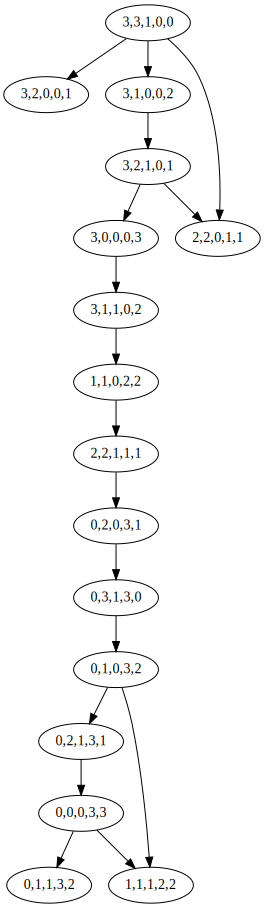

In [14]:
g.create_graphviz()

Teraz wystarczy znaleźć połączenie, czyli

In [21]:
print(g.get_connection("3,3,1,0,0","0,0,0,3,3"))

3,3,1,0,0
3,1,0,0,2
3,2,1,0,1
3,0,0,0,3
3,1,1,0,2
1,1,0,2,2
2,2,1,1,1
0,2,0,3,1
0,3,1,3,0
0,1,0,3,2
0,2,1,3,1
0,0,0,3,3


In [43]:
def read_problem(txt):
    numbers=[[int(i) for i in j.split(",")] for j in txt.split("\n")]
    res=""
    for i in range(len(numbers)-1):
        res+="<- "*(not numbers[i][2])+"M"*(-(-1)**numbers[i][2]*(numbers[i][0]-numbers[i+1][0])) + " " \
        + "K"*(-(-1)**numbers[i][2]*(numbers[i][1]-numbers[i+1][1])) + " ->"*(numbers[i][2])+"\n"
    return res

In [47]:
print(read_problem(g.get_connection("3,3,1,0,0","0,0,0,3,3")))

 KK ->
<-  K
 KK ->
<-  K
MM  ->
<- M K
MM  ->
<-  K
 KK ->
<-  K
 KK ->



In [53]:
m,k,b=6,6,2

print(read_problem(Missionaries_and_cannibals_problem(m,k,b).get_connection("6,6,1,0,0","0,0,0,6,6")))

ValueError: Nie ma takiego punktu końcowego

Zatem nie da się rozwiązać tego problemu przy urzyciu tak małej łodzi, ale jeśli będzie o 1 mniej kanibala to problemów nie ma!

In [60]:
m,k,b=6,5,2

print(read_problem(Missionaries_and_cannibals_problem(m,k,b).get_connection("6,5,1,0,0","0,0,0,6,5")))

M K ->
<-  K
M K ->
<- M 
M K ->
<-  K
M K ->
<- M 
M K ->
<-  K
M K ->
<- M 
M K ->
<-  K
M K ->
<- M 
MM  ->
<-  K
 KK ->



In [62]:
m,k,b=6,6,4

print(read_problem(Missionaries_and_cannibals_problem(m,k,b).get_connection("6,6,1,0,0","0,0,0,6,6")))

 KKKK ->
<-  K
 KK ->
<-  K
MMMM  ->
<- M K
MMM K ->
<-  K
 KKK ->



Albo jeśli łódź pomieści jednocześnie 4 osoby, ale to jest już przypadek nudny

In [69]:
Missionaries_and_cannibals_problem(2,3,2)

ValueError: Misjonerze nie żyją!

# Zad 7

SyntaxError: invalid syntax (<ipython-input-70-6472202ff5ce>, line 1)

# cos

('3', '3', '1', '0', '0', 12)

In [203]:
g=Graph()
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(3,4)
g.addEdge(2,4)
g.addEdge(2,5)
g.addEdge(5,4)
g.addEdge(4,6)
g.addEdge(23,32)
g.addEdge(32,6)
g.addEdge(5,23)
g.addEdge(7,6)
g.addEdge(12,32)
g.addEdge(12,23)
g.addEdge(8,9)
g.addEdge(9,10)
g.addEdge(10,11)
g.addEdge(8,11)
g.addEdge(9,15)

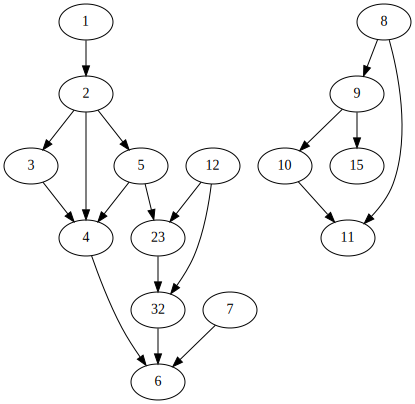

In [204]:
g.create_graphviz()

In [205]:
g.Topological_sorting()

In [206]:
for i in g.Topological_sorting():
    print(i.id)

12
8
9
15
10
11
7
1
2
5
23
32
3
4
6


In [105]:
g

1 connectedTo: [2, 11]
2 connectedTo: [3, 4, 11]
3 connectedTo: [4]
4 connectedTo: [6]
6 connectedTo: []
12 connectedTo: [1]
11 connectedTo: []
5 connectedTo: [12, 2]

In [52]:
for i in g.Topological_sorting():
    print(i.id)

5
12
1
2
11
3
4
6


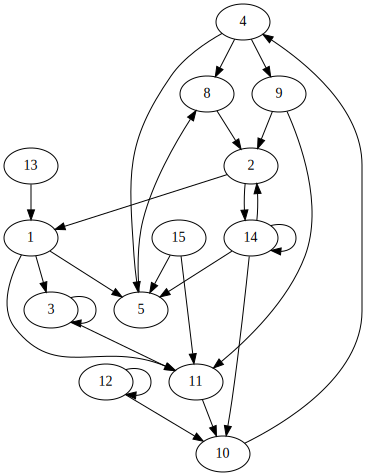

In [249]:
import random

g=Graph()

for _ in range(25):
    g.addEdge(random.randint(0,15),random.randint(0,15))
g.create_graphviz()

In [250]:
g.Breadth_first_search(4) # wyliczanie od węzła numer 12

In [251]:
print(g.get_connection(4,11))

4
9
11


In [253]:
print(g.get_connection(4,11, True))

4 -> 9 -> 11


In [254]:
g.addEdge("Hakuna","Matata")

In [255]:
g.addEdge("Matata", "Jak cudownie to brzmi!")

In [256]:
g.addEdge("Jak cudownie to brzmi!", "I wszyscy razem!")

In [257]:
g.addEdge("I wszyscy razem!", "Hakuna")

In [258]:
g

4 connectedTo: [8, 9, 5]
8 connectedTo: [2]
12 connectedTo: [12, 10]
9 connectedTo: [2, 11]
2 connectedTo: [1, 14]
11 connectedTo: [10]
10 connectedTo: [4]
5 connectedTo: [8]
1 connectedTo: [5, 11, 3]
3 connectedTo: [3, 11]
15 connectedTo: [11, 5]
13 connectedTo: [1]
14 connectedTo: [10, 2, 5, 14]
Hakuna connectedTo: ['Matata']
Matata connectedTo: ['Jak cudownie to brzmi!']
Jak cudownie to brzmi! connectedTo: ['I wszyscy razem!']
I wszyscy razem! connectedTo: ['Hakuna']

In [259]:
print(g.to_dot_language())

digraph graphname {
"4" -> "8"
"4" -> "9"
"4" -> "5"
"8" -> "2"
"12" -> "12"
"12" -> "10"
"9" -> "2"
"9" -> "11"
"2" -> "1"
"2" -> "14"
"11" -> "10"
"10" -> "4"
"5" -> "8"
"1" -> "5"
"1" -> "11"
"1" -> "3"
"3" -> "3"
"3" -> "11"
"15" -> "11"
"15" -> "5"
"13" -> "1"
"14" -> "10"
"14" -> "2"
"14" -> "5"
"14" -> "14"
"Hakuna" -> "Matata"
"Matata" -> "Jak cudownie to brzmi!"
"Jak cudownie to brzmi!" -> "I wszyscy razem!"
"I wszyscy razem!" -> "Hakuna"
}


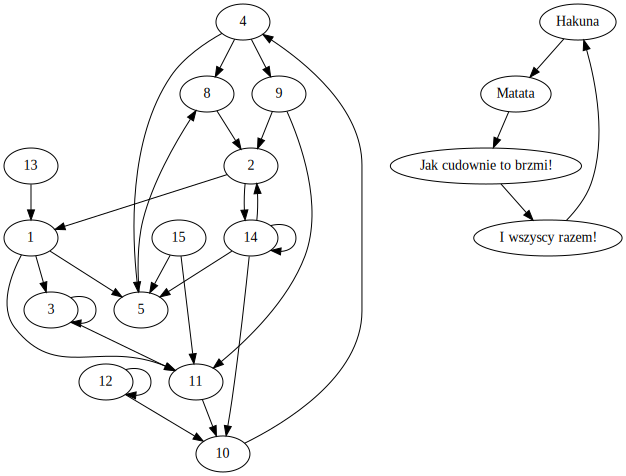

In [260]:
g.create_graphviz()

In [261]:
g.Breadth_first_search(4)

In [263]:
print(g.get_connection(4,"Hakuna"))

Exception: Nie ma takeigo połączenia

In [264]:
print(g.get_connection("Hakuna", "Jak cudownie to brzmi!"))

Hakuna
Matata
Jak cudownie to brzmi!


Jeśli damy nowy punkt początkowy, to obliczy wszystkie ścieżki dla nowego punktu